# Relatório Final

### Inteligência Computacional II

#### Aluna: Vilma Bezerra


In [31]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

## Experimento 1

In [12]:
banana_data = pd.read_csv('banana.dat', header=None)

### Parte 1 

#### Geração da base de dados Banana

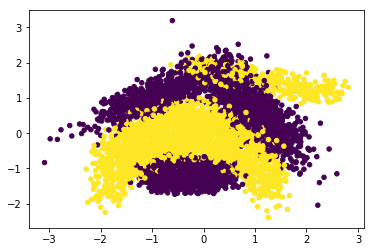

In [26]:
plt.scatter(banana_data[0], banana_data[1], c= data[2],  
            s=20) 

Pode-se observar que os dados já se encontram num certo padrão que é de certa forma desafiador para uma aplicação eficaz de um modelo de classificação.

### Parte 2

#### Testando SVM e seus diferentes kernels na separação dos dados

In [8]:
classifiers = {
    "Sigmoid - gamma 1": SVC(kernel='sigmoid', gamma=1), 
    "Sigmoid - gamma .5": SVC(kernel='sigmoid', gamma=0.5), 
    "Sigmoid - gamma .01": SVC(kernel='sigmoid', gamma=.01),
    "RBF - gamma 1": SVC(gamma=1),
    "RBF - gamma .5": SVC(gamma=.5),
    "RBF - gamma .01": SVC(gamma=.01),
    "Poly":SVC(kernel='poly', degree=3),
    "Random Forest": RandomForestClassifier(),
    "Gaussian": GaussianProcessClassifier(),
    "Neighbours": KNeighborsClassifier(),
}
X, y = banana_data.values[:, :2], banana_data.values[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
Ks = [2, 5, 10]
min_Val = 1.0
max_Val = 0.0
for name, clf in classifiers.items():
    print('\n CLASSIFIER: ', name)
    for k in Ks:
        print('K: ', k)
        kf = KFold(n_splits=k)
        iterations_score = []
        iterations_eout = []
        for train_index, val_index in kf.split(X_train):
            Xk_train, X_val = X_train[train_index], X_train[val_index]
            yk_train, y_val = y_train[train_index], y_train[val_index]

            clf.fit(Xk_train, yk_train)
            iterations_score.append(clf.score(X_val, y_val))
            iterations_eout.append(1 - clf.score(X_test, y_test))
            
        iter_Eout = np.mean(iterations_eout)
        iter_Val = np.mean(iterations_score)
        print('Average Score: ', iter_Val)
        print('Average Eout: ', iter_Eout)
        if iter_Val < min_Val:
            min_Val = iter_Val
            print('We got a worse result:', min_Val)
        if iter_Val > max_Val:
            max_Val = iter_Val
            print('We got a better result:', max_Val)
        


 CLASSIFIER:  Sigmoid - gamma 1
K:  2
Average Score:  0.2799528301886792
Average Eout:  0.7169811320754716
We got a worse result: 0.2799528301886792
We got a better result: 0.2799528301886792
K:  5
Average Score:  0.27806603773584904
Average Eout:  0.7171698113207547
We got a worse result: 0.27806603773584904
K:  10
Average Score:  0.2780660377358491
Average Eout:  0.7179245283018867

 CLASSIFIER:  Sigmoid - gamma .5
K:  2
Average Score:  0.28537735849056606
Average Eout:  0.6981132075471699
We got a better result: 0.28537735849056606
K:  5
Average Score:  0.2832547169811321
Average Eout:  0.7005660377358491
K:  10
Average Score:  0.2830188679245283
Average Eout:  0.7016037735849057

 CLASSIFIER:  Sigmoid - gamma .01
K:  2
Average Score:  0.552122641509434
Average Eout:  0.44999999999999996
We got a better result: 0.552122641509434
K:  5
Average Score:  0.552122641509434
Average Eout:  0.45
K:  10
Average Score:  0.552122641509434
Average Eout:  0.45

 CLASSIFIER:  RBF - gamma 1
K:  2

### Parte 3

#### Gerando gráfico com piores e melhores resultados e seus vetores suportes

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


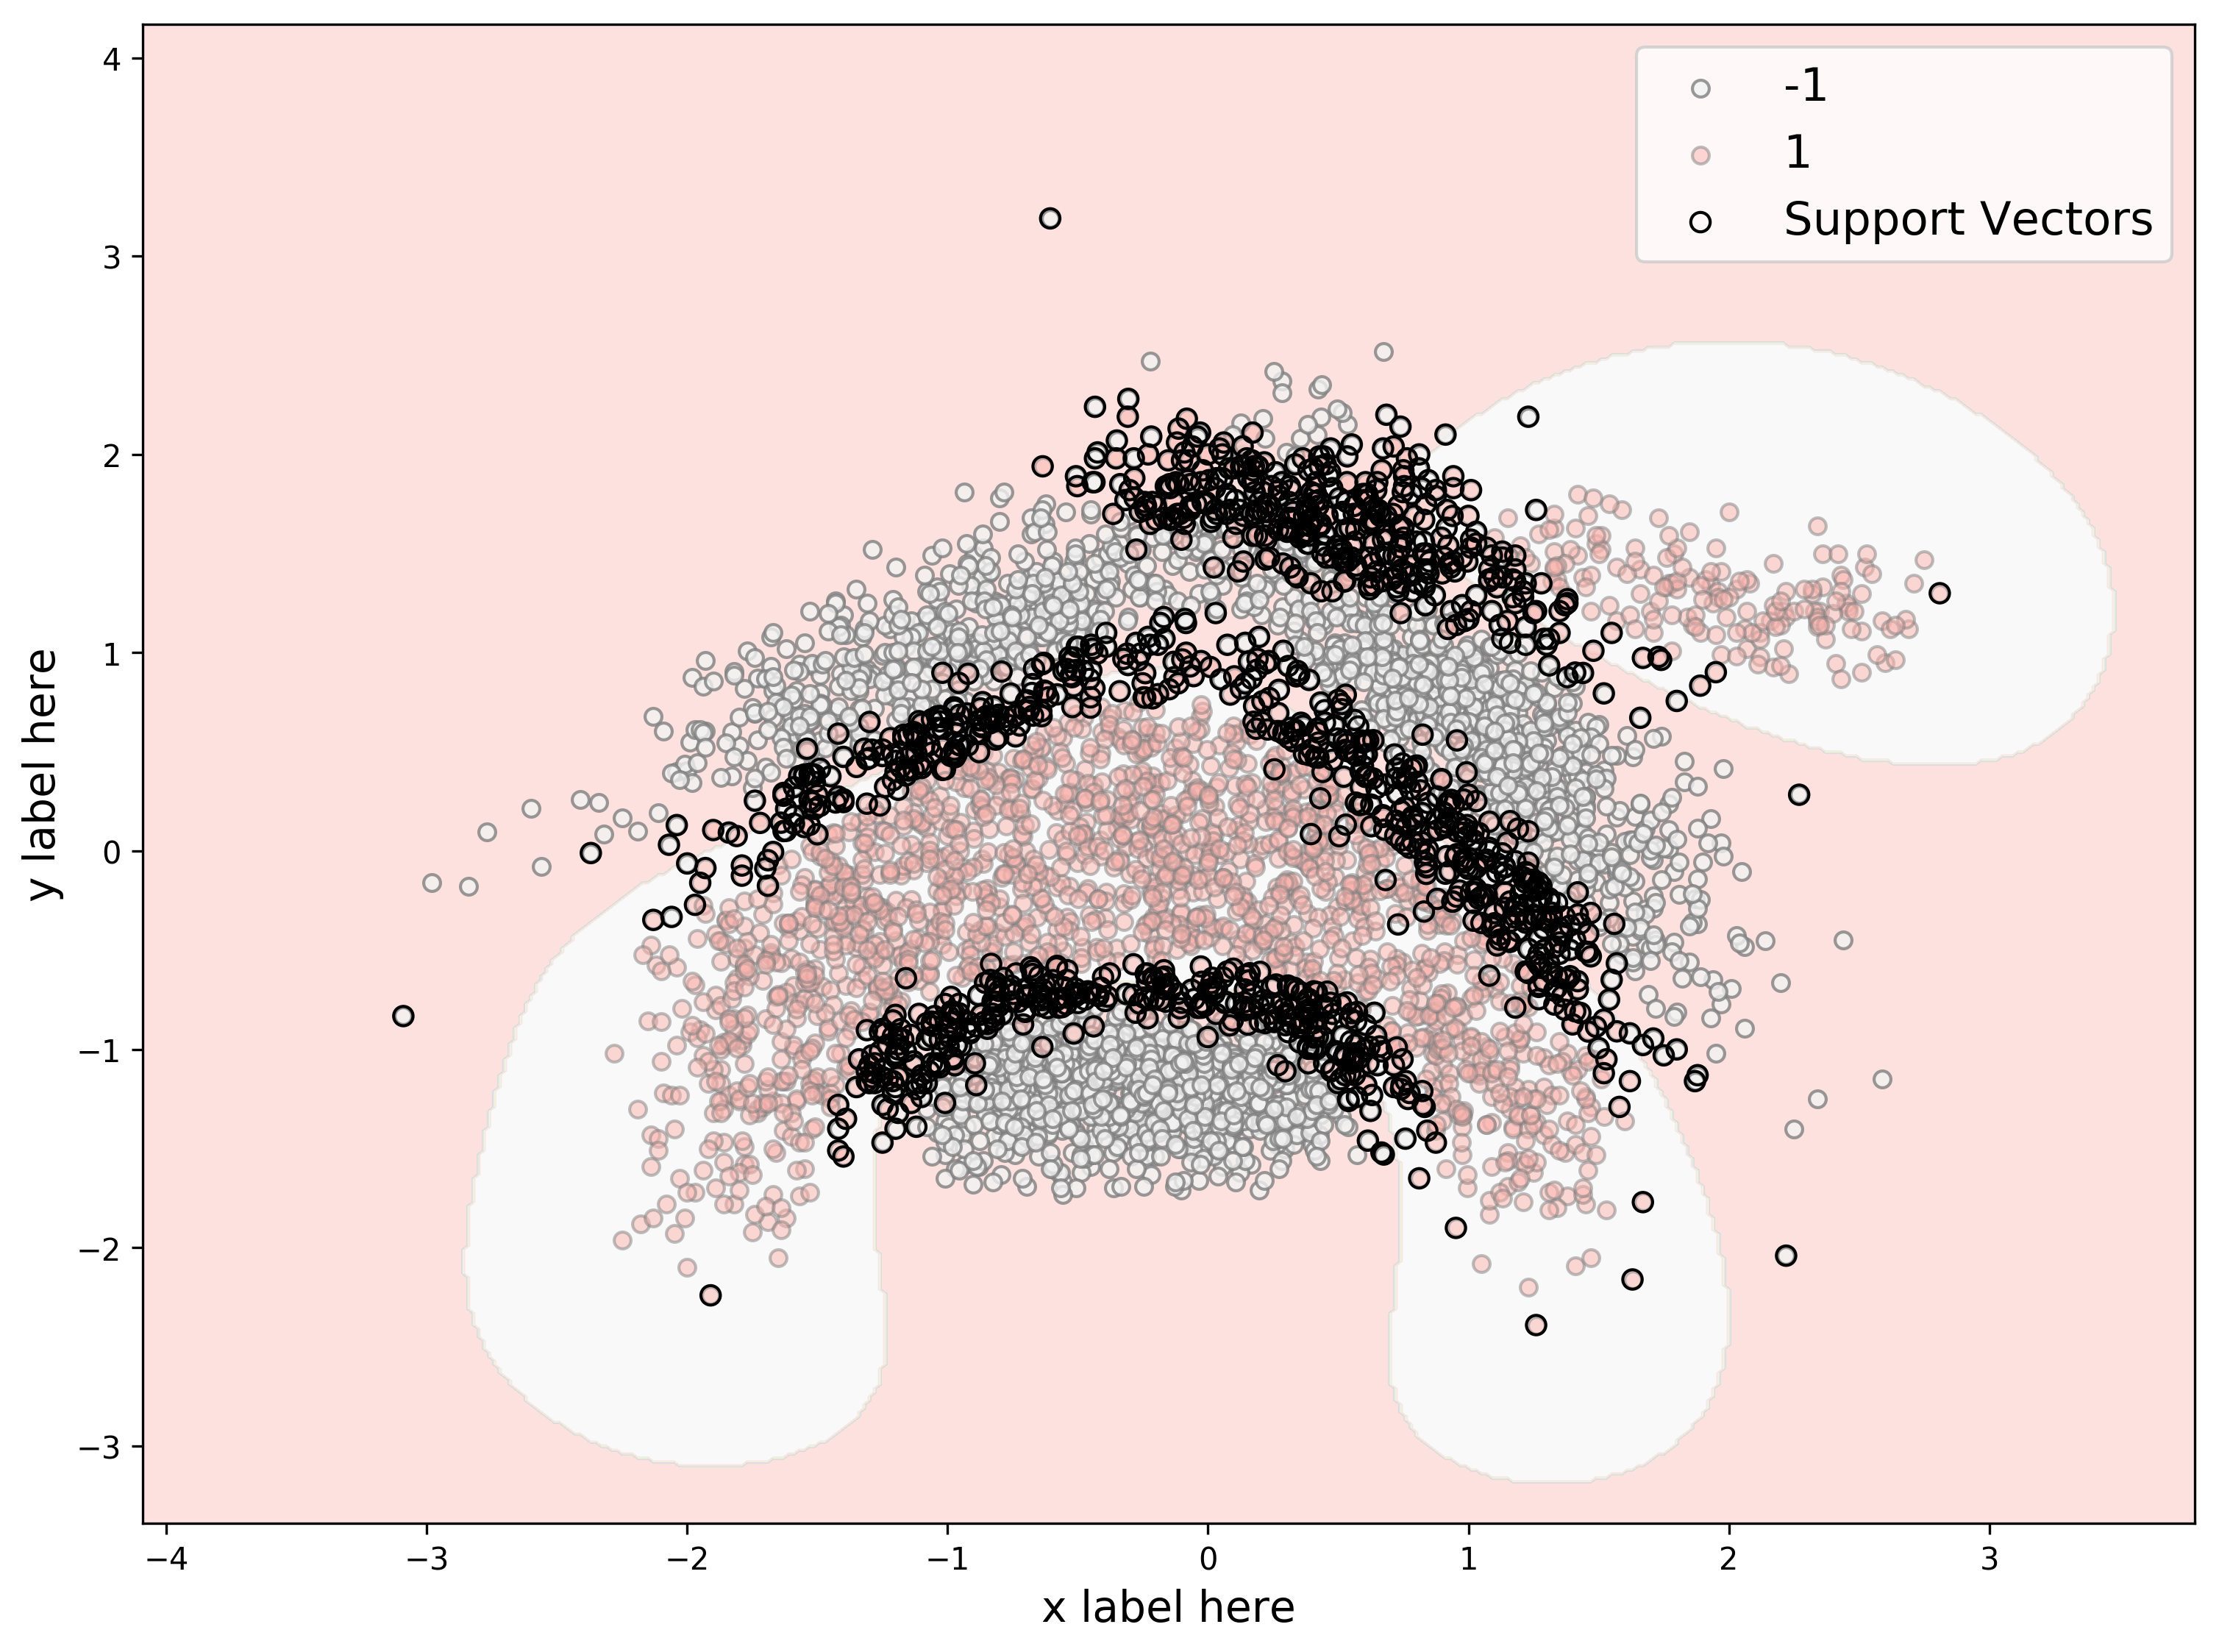

In [9]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_model_banana_result(model, data=banana_data, n_features=2):
    X, y = data.values[:, :n_features], data.values[:, n_features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
    clf = model.fit(X, y)

    fig, ax = plt.subplots(figsize=(12,9), dpi=300)
    #fig.patch.set_facecolor('white')

    cmap = plt.get_cmap('Pastel1')

    c0, c1 = np.array(list(cmap.colors)[-1]), np.array(list( cmap.colors)[0])
    c_dict1={-1:c0, 1: c1}
    # title for the plots
    title = ('Decision surface of RBF SVC ')
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    Y_tar_list = y.tolist()
    labels1 = [int(target1) for target1 in Y_tar_list]

    labl1 = {-1: '-1', 1: '1'}
    alpha1 = {-1:.8, 1:.5}

    plot_contours(ax, clf, xx, yy, alpha=0.4, cmap=cmap)
    for l1 in np.unique(labels1):
        ix1 = np.where(labels1==l1)
        ax.scatter(X0[ix1], X1[ix1],c=c_dict1[l1], label=labl1[l1], 
                   s=30, alpha=alpha1[l1], edgecolors='grey')
    if isinstance(model, SVC):
        ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1], 
                   label='Support Vectors', s=40, edgecolors='black', facecolor='none')


    plt.legend(fontsize=15)

    plt.xlabel('X0', fontsize=14)
    plt.ylabel('X1', fontsize=14)
    plt.savefig('Classify Banana Set.png', dpi=300)
    plt.show()

# The best result: RBF - gamma 1
model = classifiers['RBF - gamma 1']
plot_model_banana_result(model)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


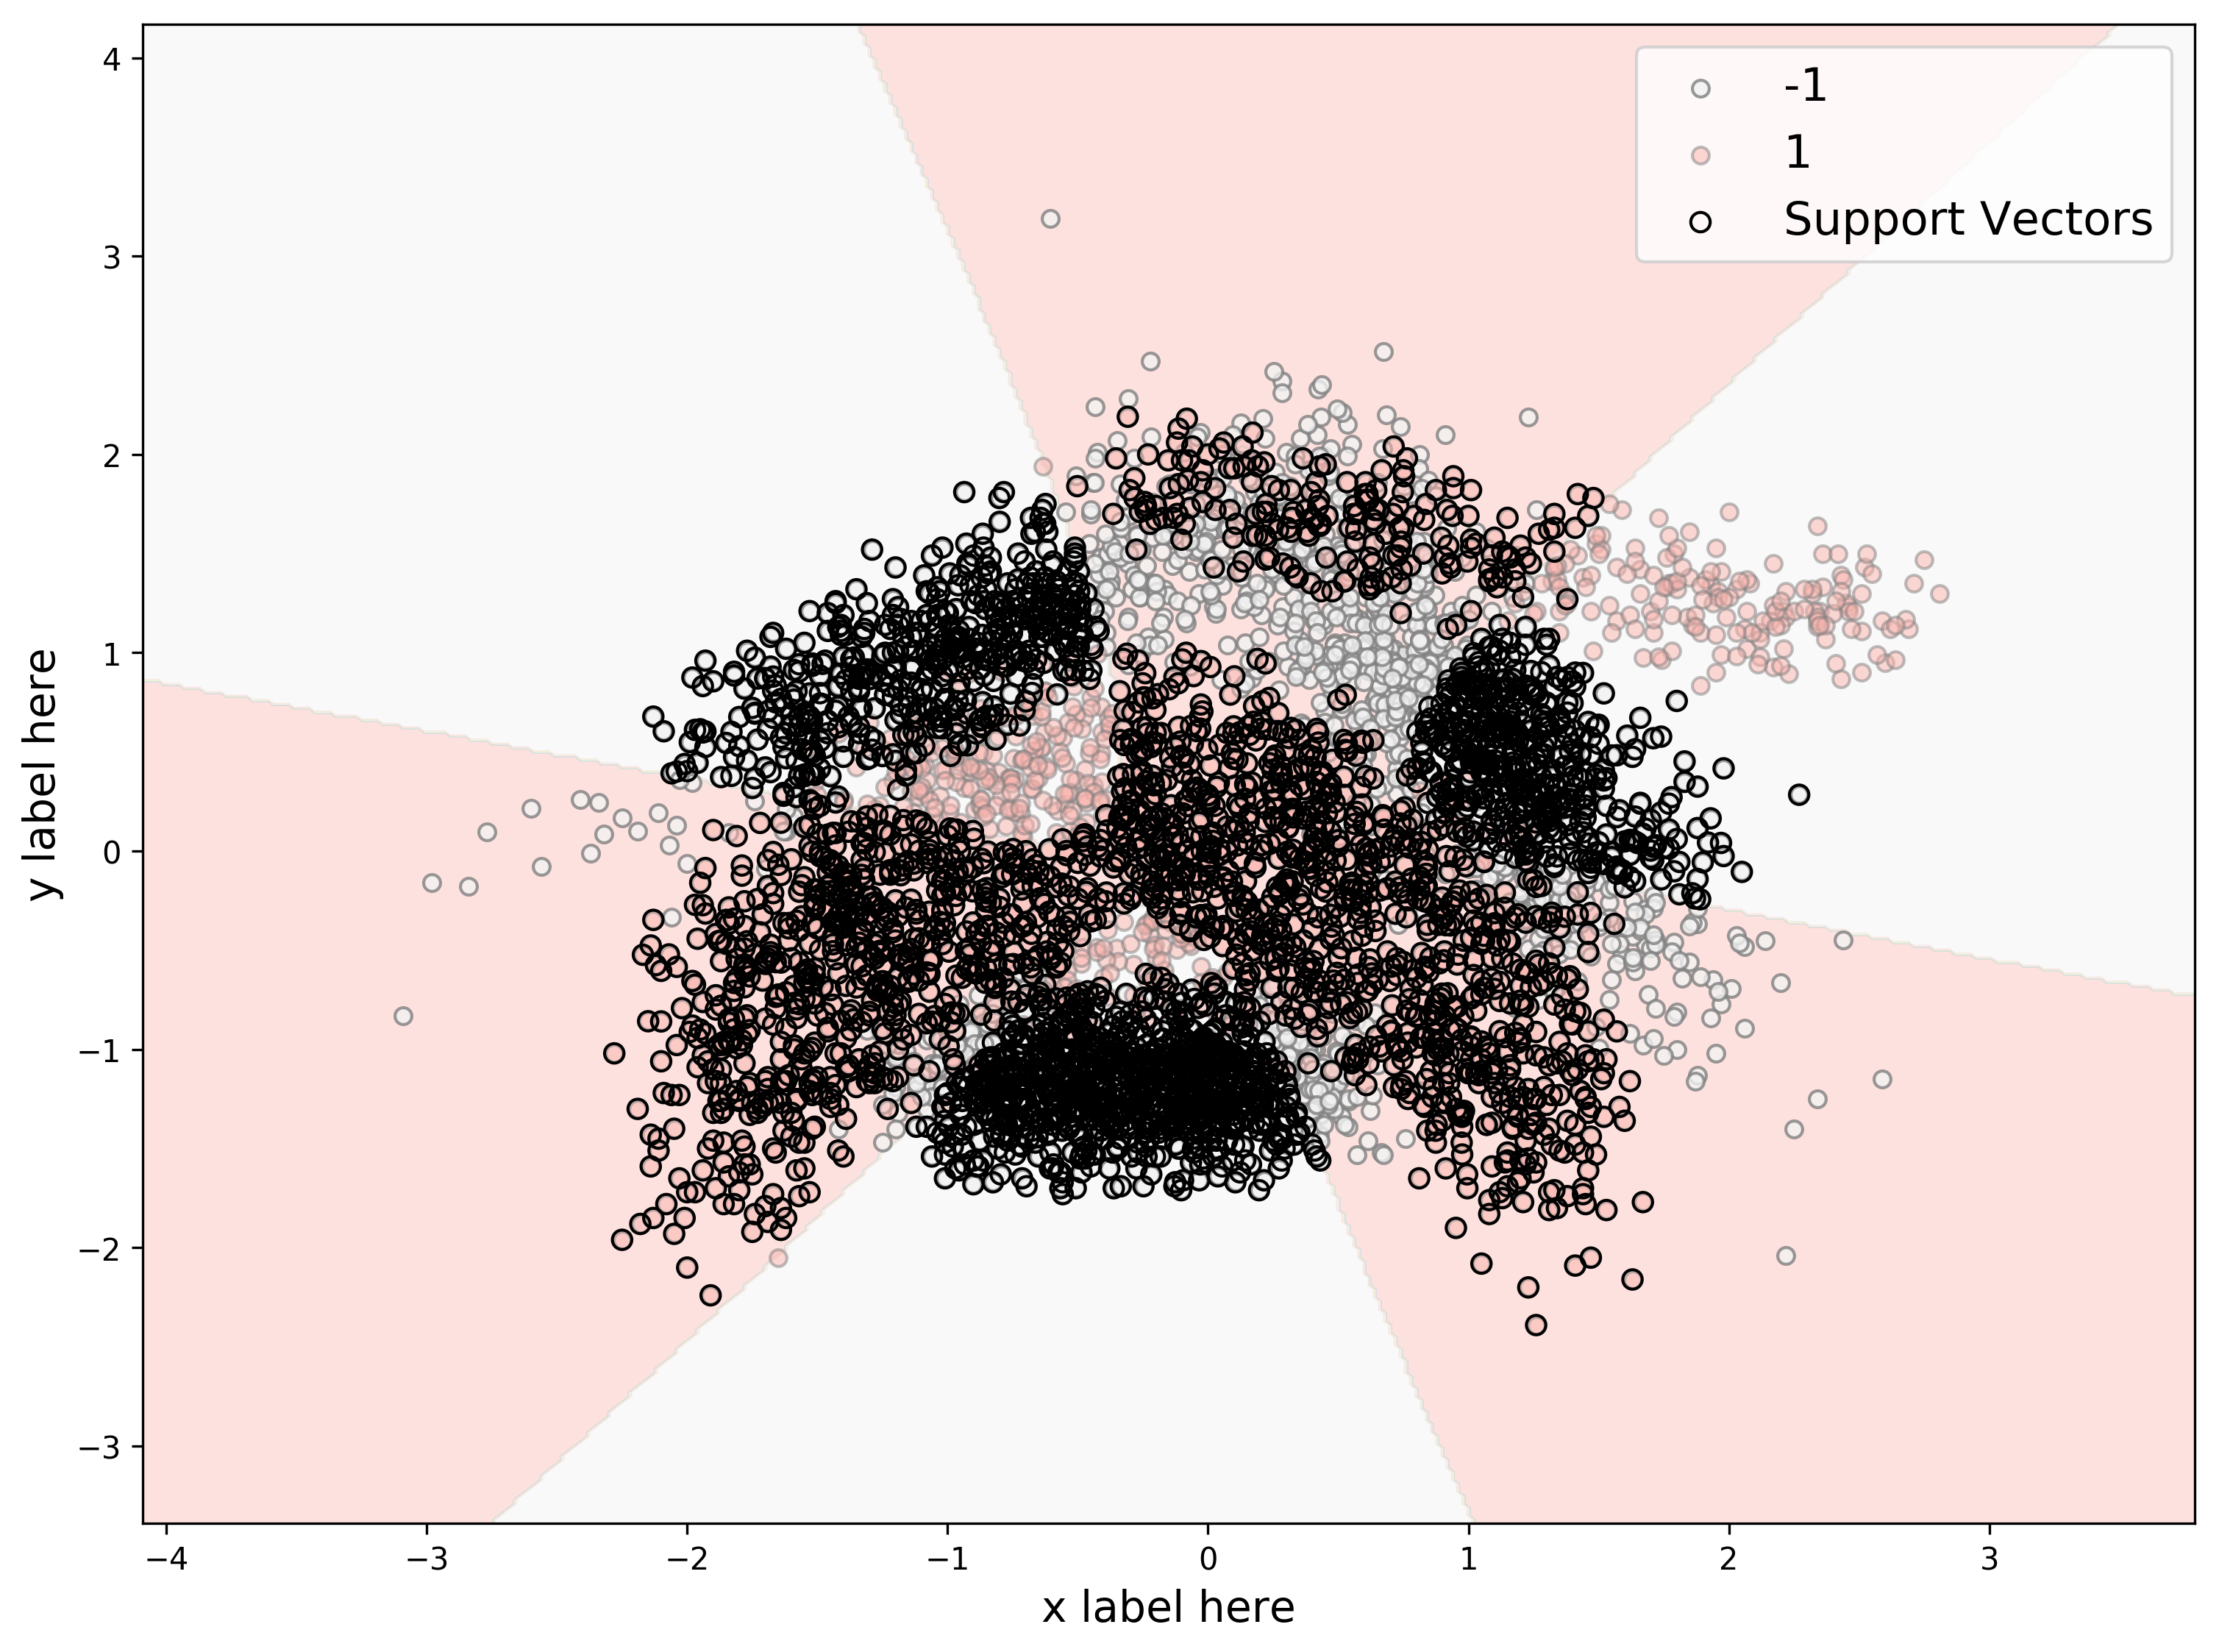

In [10]:
# The worst result: Sigmoid - gamma .5
model = classifiers['Sigmoid - gamma .5']
plot_model_banana_result(model)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


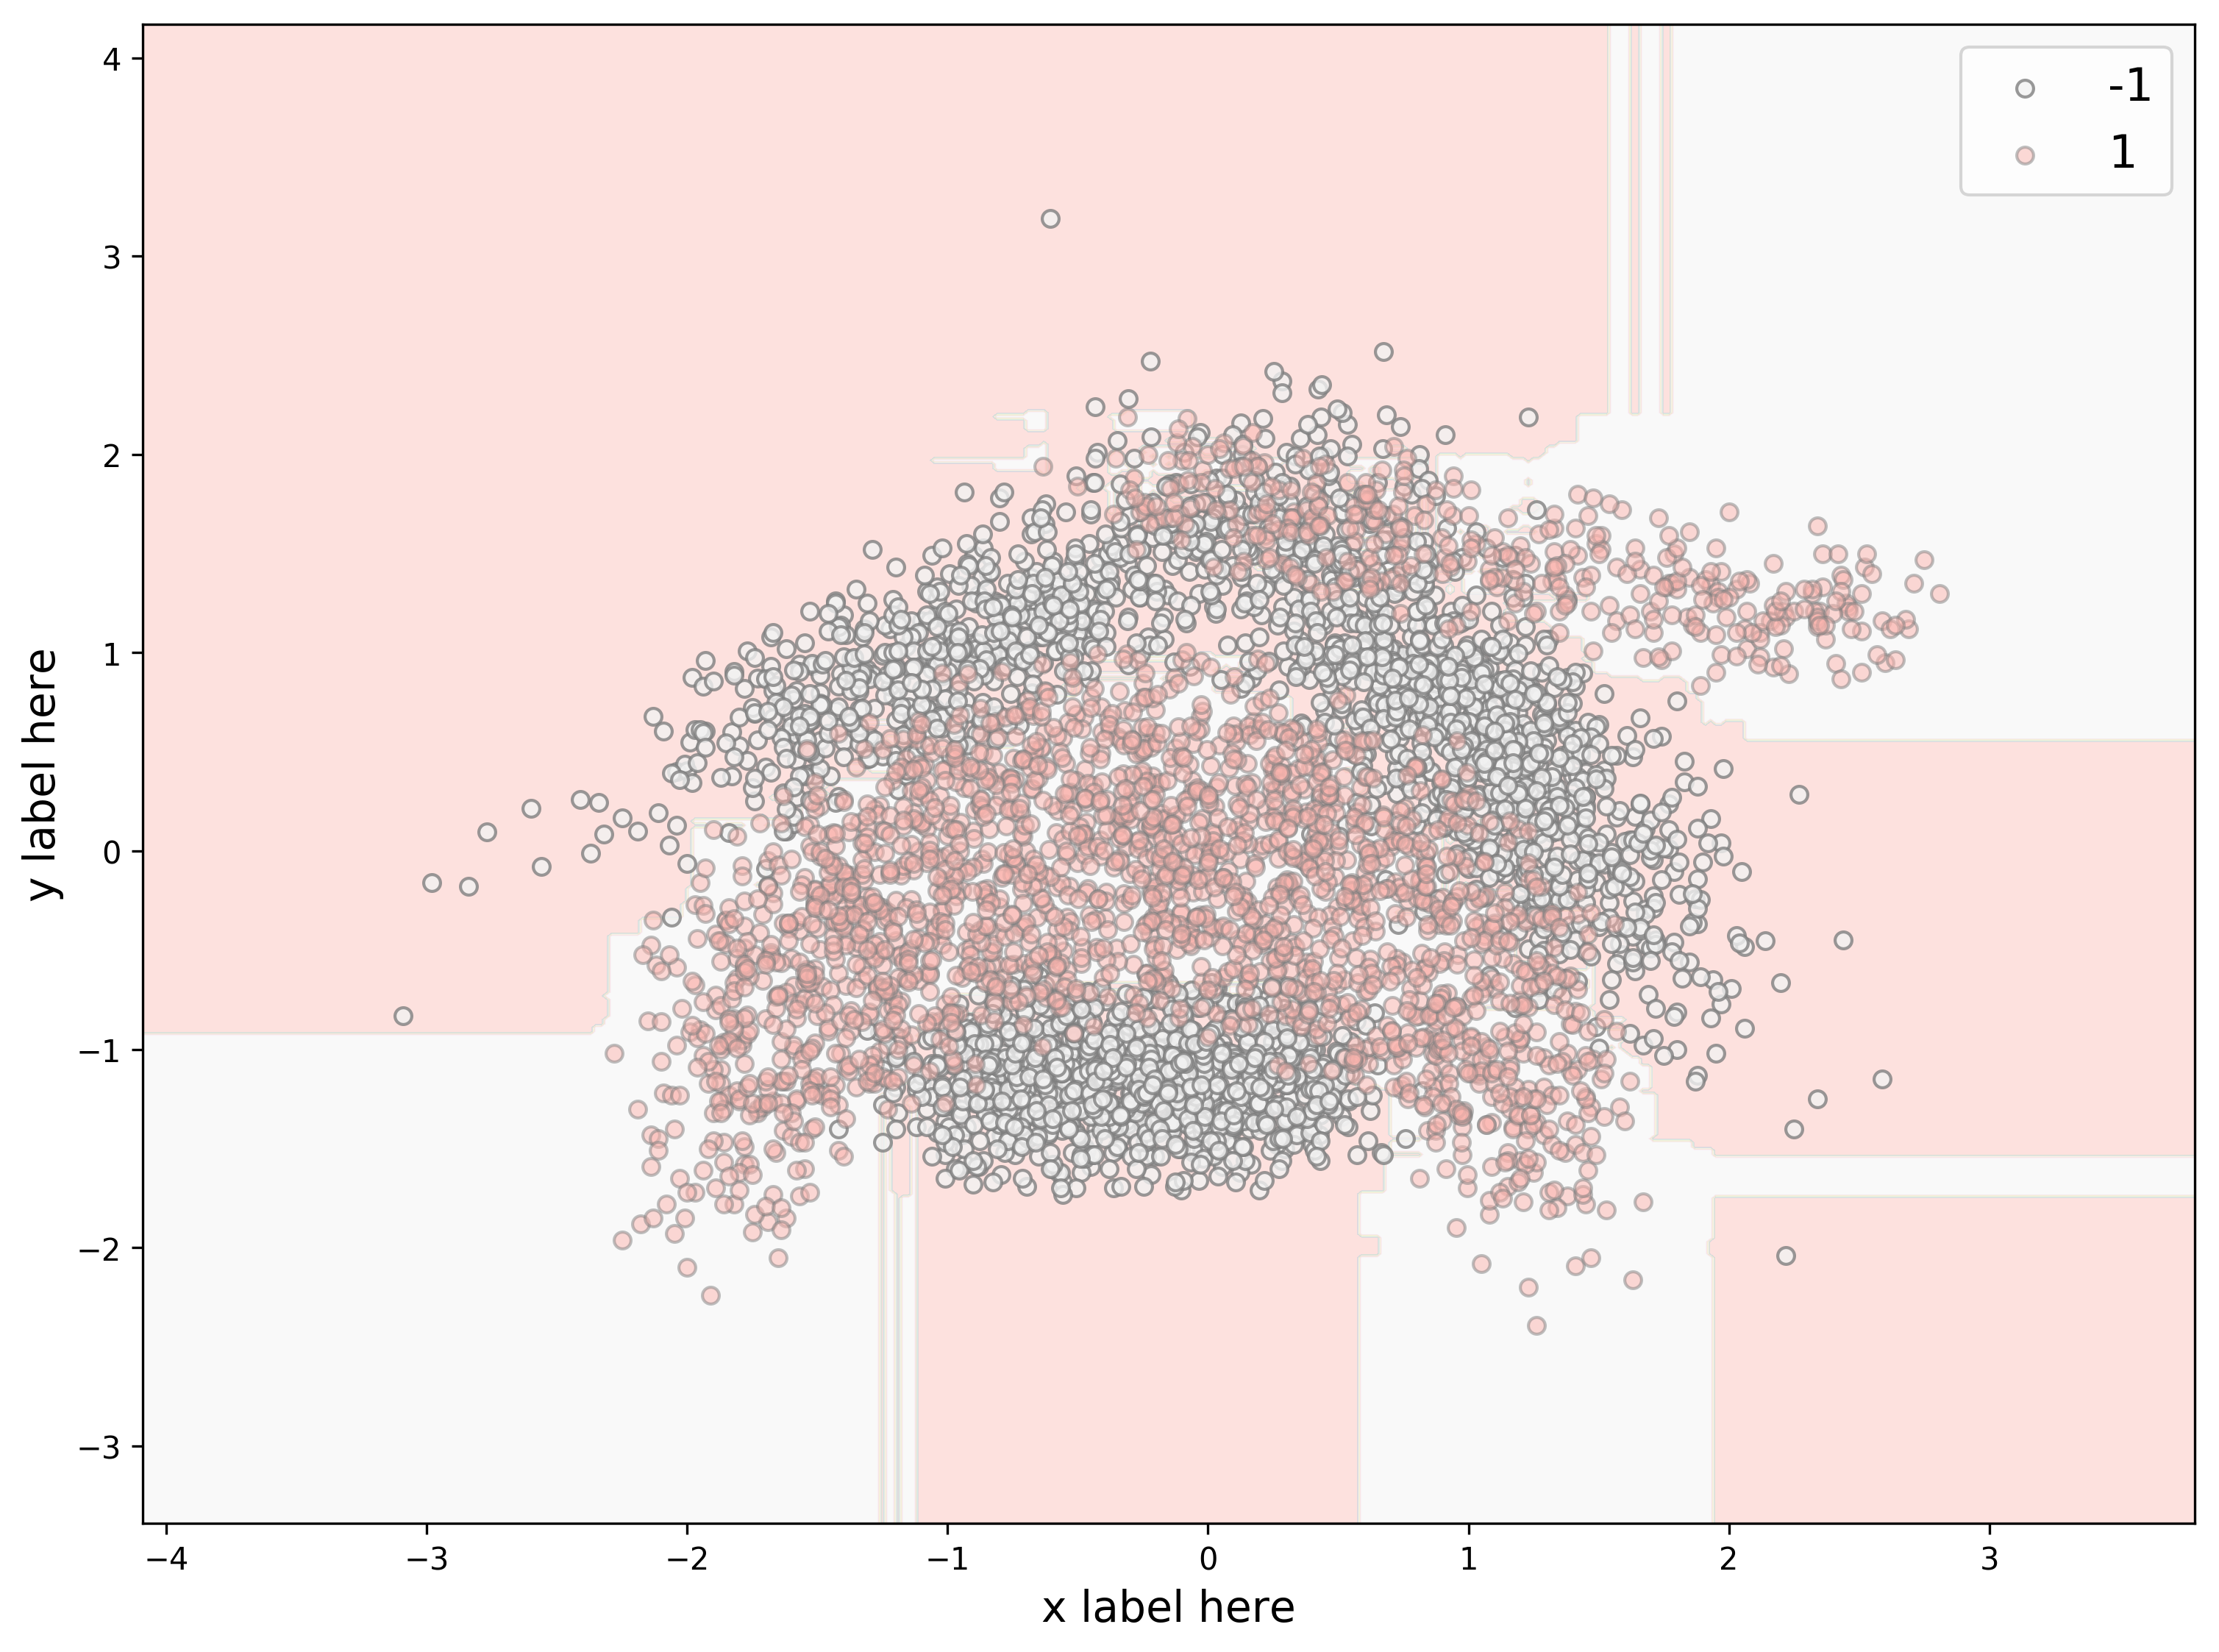

In [11]:
model = classifiers["Random Forest"]
plot_model_banana_result(model)

## Experimento 2

### Part 1

In [67]:
def read_plot_and_classify_data(file_name, n_features, transform=False):    
    data = pd.read_csv(file_name, header=None)
    if transform:
        from sklearn.preprocessing import LabelEncoder
        LE = LabelEncoder()
        data[n_features] = LE.fit_transform(data[n_features])
        print(data.head())
    X, y = data.values[:, :n_features], data.values[:, n_features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents)

    plt.scatter(principalDf[0], principalDf[1],
                c= data[n_features],  
                s=20) 
    
    model = classifiers['RBF - gamma 1']
    model.fit(X_train, y_train)
    print('RBF Score:', model.score(X_test, y_test))
    print('RBF Eout:',1 - model.score(X_test, y_test))
    
    model = classifiers['Random Forest']
    model.fit(X_train, y_train)
    print('Random Forest Score:', model.score(X_test, y_test))
    print('Random Forest Eout:',1 - model.score(X_test, y_test))

#### WINE DATA

RBF Score: 0.4166666666666667
RBF Eout: 0.5833333333333333
Random Forest Score: 1.0
Random Forest Eout: 0.0


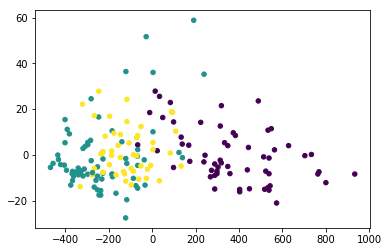

In [62]:
read_plot_and_classify_data('wine.dat', 13)

#### PHONEME DATA

RBF Score: 0.8593894542090657
RBF Eout: 0.14061054579093435
Random Forest Score: 0.8908418131359852
Random Forest Eout: 0.1091581868640148


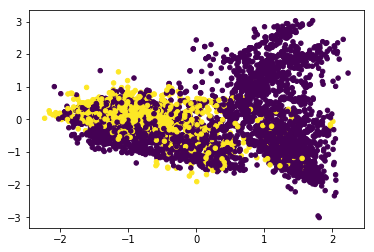

In [63]:
read_plot_and_classify_data('phoneme.dat', 5)

#### MAGIC DATA

RBF Score: 0.6614090431125131
RBF Eout: 0.33859095688748686
Random Forest Score: 0.8661934805467929
Random Forest Eout: 0.1338065194532071


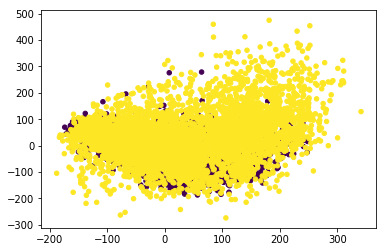

In [69]:
read_plot_and_classify_data('magic.dat', 10, transform=True)


#### HEART DATA

RBF Score: 0.42592592592592593
RBF Eout: 0.5740740740740741
Random Forest Score: 0.7407407407407407
Random Forest Eout: 0.2592592592592593


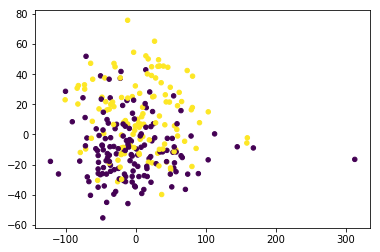

In [65]:
read_plot_and_classify_data('heart.dat', 13)

#### COIL2000 DATA

RBF Score: 0.9379134860050891
RBF Eout: 0.06208651399491094
Random Forest Score: 0.9287531806615776
Random Forest Eout: 0.07124681933842236


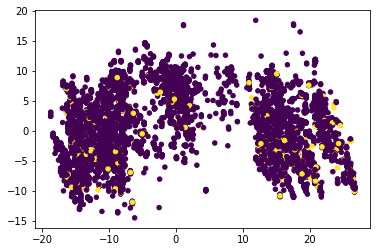

In [66]:
read_plot_and_classify_data('coil2000.dat', 85)